# Linear Algebra Review & Pytorch Introduction
#### by: Michael Przystupa


### At the conclusion of this presentation, participants will be able to:
- Distinguish scalars, vectors, matrices, and tensors
- Recall several matrix mathematical operations
- Recognize special types of matrices
- Calculate basic linear algebra statements with pytorch
- Recognize python statements

In [8]:
from IPython.display import display, Math, Latex
import torch 
import numpy as np
import matplotlib.pyplot as plt

# Section 2.1: Scalars, Vectors, Matrices and Tensors

## Scalar
- A single number with an associated type 
  - e.g. real or natural

In [9]:
#Scalars in python
a = 1 # integer
b = 1. # float

#Scalars in pytorch
e = torch.tensor(a) # can pass variables as input
f = torch.tensor(1.) # type of number will change tensor type

display(" {} (Think of long as synonymous with integer)".format(e.type())) 
display(f.type())

#Defining scalars as pytorch tensors is not requires for math operations:
display(a * e)
display (b + f.item()) #calling item gets the value stored in the tensor

' torch.LongTensor (Think of long as synonymous with integer)'

'torch.FloatTensor'

tensor(1)

2.0

## Vector
- An array of numbers
- usually referenced as points in space

In [10]:
#Vector e.g.
x = [1., 3., 4.] #conceptually, could be viewed as a list
y = torch.tensor([2.,3.,8.]) # Defining a vector in pytorch
z = torch.tensor(y) # Can initialize a vector using a pre-defined tensor or list
t = torch.from_numpy(np.array(x)) #in case you really like numpy
display('x: ' + str(x))
display('y: ' + str(y))
display('z: ' + str(z))

#adds stuff for accessing arrays (mention DL thoughts about indexing notation)

'x: [1.0, 3.0, 4.0]'

'y: tensor([ 2.,  3.,  8.])'

'z: tensor([ 2.,  3.,  8.])'

## Matrix: 
- a 2 dimensional array of numbers

In [11]:
A = torch.tensor([
    [1.,0, 0],
    [2.,4.,0],
    [3.,5.,7,]
]) #as easy as declaring a python list of lists

display(A)
#Remember that python indexes start at 0!'
display(Math('A_{00} =' + str(A[0,0]))) 

i, j = 2, 2 # this will be 3rd row and column
display(Math('A_{ij} = ' + str(A[i,j])))
display(Math('A_{i, :} = ' + str(A[i,:]))) #accessing a whole row
display(Math('A_{:, j} =' + str(A[:,j]))) #accessing a whole column

tensor([[ 1.,  0.,  0.],
        [ 2.,  4.,  0.],
        [ 3.,  5.,  7.]])

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

## Tensor
- A multi-dimensional array of numbers
- Generally the term used when describing these data types
- Each dimension is often referred to as an axis

In [12]:
#Code for using tensors
A = torch.rand((3,3)) # we declare a matrix
B = torch.stack([A,A, A], dim=2) #stack is a way to combine matrices into a tensor
C = torch.tensor([
    [ [2, 2],
      [2, 2]],
    [   [3, 1],
        [3, 1]
    ],[
        [4, 5],
        [4, 5]]
]) #tensors can have more than 3 axis
i,j,k = 0, 1, 1 
display(Math('B_{i, j, k} =' + str(B[i,j,k])))
display(Math('C_{i,:,:}='))
display((C[i, :, :]))
display(Math('C_{:,j,:}='))
display((C[:, j, :]))
display(Math('C_{:,:,k}=' ))
display((C[:, :, k]))


<IPython.core.display.Math object>

<IPython.core.display.Math object>

tensor([[ 2,  2],
        [ 2,  2]])

<IPython.core.display.Math object>

tensor([[ 2,  2],
        [ 3,  1],
        [ 4,  5]])

<IPython.core.display.Math object>

tensor([[ 2,  2],
        [ 1,  1],
        [ 5,  5]])

## Transpose 
- The mirror image of the the matrix across the main diagonal line
- Achieved by swapping each row $i^{th}$ position with associated column $j^{th}$ position:
  - $A_{ij} \rightarrow A_{ji}$


In [13]:
#Tranpose examples
#Given some Matrix:
A = torch.tensor([
    [1.,0, 0],
    [2.,4.,0],
    [3.,5.,7,]
])
# You can tranpose it with pytorch like this:
A_t = A.t() #also torch.transpose(A,0, 1) would work
display(A)
display(A_t)

# Vectors:
x = torch.tensor([[1,2,3]]) #note here I have a list in a list even though it's a vector
display(x.size()) #You might do this to explicitly identify this as a row or column vector
display(x) #this will be viewed as a row vector or a 1 x 3 matrix
display(x.t()) #the transpose makes it a column vector or a 3 x 1 matrix

tensor([[ 1.,  0.,  0.],
        [ 2.,  4.,  0.],
        [ 3.,  5.,  7.]])

tensor([[ 1.,  2.,  3.],
        [ 0.,  4.,  5.],
        [ 0.,  0.,  7.]])

torch.Size([1, 3])

tensor([[ 1,  2,  3]])

tensor([[ 1],
        [ 2],
        [ 3]])

## Matrix Addition

- If 2 matrices have the same shape we can add their them element-wise:
  - $A_{ij} + B_{ij} = C_{ij},\forall i,j$

In [14]:
A = torch.tensor([
    [2,2],
    [3,3]
])
B = torch.tensor([
    [1,1],
    [1,1]
])
C = torch.cat([B, B]) # another way of combining several matrices

display(A + B) # This will work because they are the same size
display(A + C) # this will fail because C is twice as big

tensor([[ 3,  3],
        [ 4,  4]])

RuntimeError: The size of tensor a (2) must match the size of tensor b (4) at non-singleton dimension 0

## Scalar operations on a matrix
- Multiplying a matrix by a scalar changes each element
  - This applies for addition and other operations as well

In [15]:
a = 3.0
B = torch.ones((3,3)) #a special matrix where all entries are ones
display(a * B)

c = 5.0 #we define a scalar here, note again it is not a tensor
D = a * B + c #an affine function operation
E = (D - c) / a # here we see that dividing still works as well
display(D)
display(E)

tensor([[ 3.,  3.,  3.],
        [ 3.,  3.,  3.],
        [ 3.,  3.,  3.]])

tensor([[ 8.,  8.,  8.],
        [ 8.,  8.,  8.],
        [ 8.,  8.,  8.]])

tensor([[ 1.,  1.,  1.],
        [ 1.,  1.,  1.],
        [ 1.,  1.,  1.]])

## Broadcasting
- Deep learning allows adding vectors directly matrices:
  - It's like copying a vector to be a matrix of the same size
  - Dimensions of vector must be equal to rows or columns of matrix

In [16]:
A = torch.zeros((4,4))
b = torch.tensor([1., 3., 2., 4.])
c = b.unsqueeze(0) #an operation that adds a dimension to an existing tensor
d = c.t()

display(A + b) 
display(A + c)
display(A + d)

tensor([[ 1.,  3.,  2.,  4.],
        [ 1.,  3.,  2.,  4.],
        [ 1.,  3.,  2.,  4.],
        [ 1.,  3.,  2.,  4.]])

tensor([[ 1.,  3.,  2.,  4.],
        [ 1.,  3.,  2.,  4.],
        [ 1.,  3.,  2.,  4.],
        [ 1.,  3.,  2.,  4.]])

tensor([[ 1.,  1.,  1.,  1.],
        [ 3.,  3.,  3.,  3.],
        [ 2.,  2.,  2.,  2.],
        [ 4.,  4.,  4.,  4.]])

# Section 2.2 Multiplying Matrices and Vectors

## Dot Product:
- For vectors a and b with same size , the dot product combines them into a scalar:

\begin{equation*}
 a \cdot b = \sum_{i=1}^n a_i * b_i
\end{equation*}

In [17]:
a = [3, 4, 5]
b = [1, 2, 3]
def dotprod(x, y):
    assert(len(x) == len(y)) #makes sure both are same length
    #acc = 0.0
    #for i in range(0, len(x)):
        # acc = acc + x[i] * y[i]
    #return acc
    #below is called a list comprehension and allows us to write the above compactly
    return sum([x[i] * y[i] for i in range(0, len(x))]) 
display(dotprod(a,b))
display(torch.dot(torch.tensor(a), torch.tensor(b)))



26

tensor(26)

## Matrix Product:
- Like applying dot products for multiple entries at once
- Requires Matrix A to have same number of columns as Matrix B has rows:
    - $A \epsilon R^{mxn}$ and $B \epsilon R^{nxp}$
    - produces new matrix $C \epsilon R^{mxp}$ 
- Here is the formula for each entry:
\begin{equation*}
  C_{ij} = \sum_{i=1}^n A_{i,k}B_{k, j}
\end{equation*}

In [18]:
A = torch.tensor([
    [1,2,3],
    [2,3,4]
])
B = torch.tensor([
    [4,5],
    [5,6]
])

#optional exercise for at home: implement the matrix product yourself!
display(A.size())
display(B.size())
display(torch.mm(B, A)) #why is B before A?

torch.Size([2, 3])

torch.Size([2, 2])

tensor([[ 14,  23,  32],
        [ 17,  28,  39]])

## Element-wise (Hadamard) Product: 
- For $A \epsilon R^{mxn}$ and $B \epsilon R^{mxn}$ we multiply each of the elements directly, so for each entry of $C = A \odot B$:

\begin{equation*}
C_{ij} = A_{ij}*B_{ij}
\end{equation*}

In [19]:
A = torch.tensor([
    [1,2],
    [3,4]
])
B = torch.tensor([
    [2, 3],
    [4, 5]
])

display(A * B) #it's like multiplying scalars, but matrices

tensor([[  2,   6],
        [ 12,  20]])

## Matrix Properties:
- Lets just see the code:

In [20]:
#The matrices we'll use for each property
A = torch.tensor([
    [1,2,3],
    [2,3,4]
]) #2 x 3 matrix
B = torch.tensor([
    [4,5],
    [5,6]
]) # 2 x2 matrix
C = B + 1 # another 2x2 matrix 

## Distributive Law

In [21]:
display(Math('(B + C)A = BA + CA'))
display(torch.mm( B + C, A))
display(torch.mm(B, A) + torch.mm(C, A))

<IPython.core.display.Math object>

tensor([[ 31,  51,  71],
        [ 37,  61,  85]])

tensor([[ 31,  51,  71],
        [ 37,  61,  85]])

## Associative Law

In [22]:
display(Math('(BC)A = B(CA)'))
display(torch.mm(torch.mm(B, C), A))
display(torch.mm(B, torch.mm(C, A) ))

<IPython.core.display.Math object>

tensor([[ 168,  277,  386],
        [ 205,  338,  471]])

tensor([[ 168,  277,  386],
        [ 205,  338,  471]])

## Commutative Law

In [23]:
#Matrices ARE NOT commutative!
display('AB != BA')
torch.mm(A,B)

'AB != BA'

RuntimeError: size mismatch, m1: [2 x 3], m2: [2 x 2] at /opt/conda/conda-bld/pytorch_1524580938250/work/aten/src/TH/generic/THTensorMath.c:2033

# Linear Systems of Equations

- Probably will never be used in class, but lets see them anyways!
- For known matrix $A \epsilon R^{mxn}$, $ b \epsilon R^{m}$, and $x \epsilon R^{m}$ of unknowns:

\begin{equation*}
 Ax = b
\end{equation*}
- The objective is to then find x
- pytorch has some solvers to do this:
  - https://pytorch.org/docs/stable/torch.html?highlight=linear%20solver#torch.gesv
    - link to one solver, although several ways to do this

# Section 2.3: Identity and Inverse Matrices

## Identity Matrix
- A matrix that does not change any vector when that matrix and the vector are multiplied.
  - Often denoted with I:
\begin{equation*}
 AI = A
\end{equation*}  
- This is a matrix with 1's on the main diagonal and 0's every where else
  - Generally a square matrix

In [24]:
#Identity matrix examples
A = torch.rand((3,3)) # a matrix of randomly generated numbers
display(torch.eye(3))
display(torch.eye(4))
display(A)
display(torch.mm(A, torch.eye(3)))

tensor([[ 1.,  0.,  0.],
        [ 0.,  1.,  0.],
        [ 0.,  0.,  1.]])

tensor([[ 1.,  0.,  0.,  0.],
        [ 0.,  1.,  0.,  0.],
        [ 0.,  0.,  1.,  0.],
        [ 0.,  0.,  0.,  1.]])

tensor([[ 0.7159,  0.8091,  0.1056],
        [ 0.4336,  0.9223,  0.8569],
        [ 0.6757,  0.4213,  0.8328]])

tensor([[ 0.7159,  0.8091,  0.1056],
        [ 0.4336,  0.9223,  0.8569],
        [ 0.6757,  0.4213,  0.8328]])

## Matrix Inverse
- For a matrix A, the inverse is such that:
\begin{equation*}
A^{-1} A = I_{n}
\end{equation*}  

In [25]:
A = torch.tensor([
    [1., 0. ,0.],
    [2., 3., 0.],
    [4., 5., 6.]
])

display(A)
display(A.inverse())
display(torch.mm(A.inverse(), A))

tensor([[ 1.,  0.,  0.],
        [ 2.,  3.,  0.],
        [ 4.,  5.,  6.]])

tensor([[ 1.0000,  0.0000,  0.0000],
        [-0.6667,  0.3333, -0.0000],
        [-0.1111, -0.2778,  0.1667]])

tensor([[ 1.0000,  0.0000,  0.0000],
        [ 0.0000,  1.0000, -0.0000],
        [ 0.0000, -0.0000,  1.0000]])

## Solving Linear equations with Inverses
- You can use matrix inversion to solve linear systems of equation. However, the matrix A must be square and not singular:

\begin{equation*}
A^{-1}Ax = x =  A^{-1}b
\end{equation*}

- What does any of that mean?

# Section 2.4 Linear Dependence and Span

## $A^{-1} \exists \iff Ax = b$ has a unique solution $\forall b \epsilon R^{m}$
- $Ax = b$ has exactly 3 options for solutions:
  - $x$ is unique solution
  - $x$ has $\infty$ solutions
    - for 2 solutions $a$ & $b$ there is $z = \alpha a + (1-\alpha) b$ other solutions, $\alpha \epsilon R$ 
  - $x$ has no solution

## Linear Combination
- For a set of vectors $v^{(1)},..., v^{(n)}$ and scalars $c_{1},...c_{n}$ create new vector $v'$:
\begin{equation*}
v' = \sum_{i}^{n} c_{i}v^{(i)}
\end{equation*}
- A solution to $Ax = b$ is a linear combination of the vectors in A



In [26]:
v1 = torch.tensor([1.,2., 3.])
v2 = torch.tensor([2.,7., 4.])
c1 = .4
c2 = .6
vhat = c1*v1 + c2*v2
print(vhat) # your goto for displaying variables

tensor([ 1.6000,  5.0000,  3.6000])


## Span
- All points obtainable by linear combination of a set of vectors $v^{(1)}...v^{(n)}$
- Column Space (Range): the span of for a matrix A when solving $Ax=b$, i.e. all the vectors b that are combinations of the columns of A
  - if b not in the span of A, then there is no solution
  - To have a solution having at least as many columns as rows is probably important
    - If number of columns < number of rows then there are values we can't represent
    - Is it enough though?

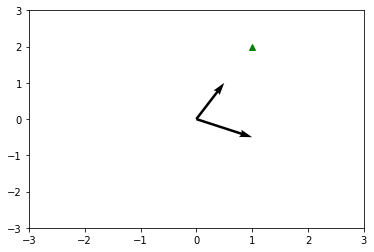

In [27]:
#A visual to hopefully get idea of span across
#Using the above facts here's a visual
A = torch.tensor([
    [.5, 1],
    [1, -.5]
])
#plt.quiver([0, 0], [0, 0], [.5, 1], [1, -.5 ], angles='xy', scale_units='xy', scale=1)
plt.quiver([0, 0], [0, 0], A[:,0], A[:,1], angles='xy', scale_units='xy', scale=1)
plt.plot(1,2, 'g^') #an arbitrary choice for solution b
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.show()

## Linear Independence
- For a set of vectors $v^{(1)}...v^{(n)}$, no vector in the set is a combination of other vectors in the set

In [28]:
A = torch.tensor([
    [1,-2, 1],
    [0, 2,-2],
    [0, 0, 1]
])
#Generally is obvious if you can get your matrix in the form above
# the above  matrix also called a "square matrix"

## Linear Dependence
- For a set of vectors $v^{(1)}...v^{(n)}$ , $\exists$ a vector which is a combination of other vectors in the set

In [29]:
A = torch.tensor([
    [1,-2, 1, 4],
    [0, 2,-2, 2],
    [0, 0, 1, 3]    
]) #is now dependent as 4th column is combination of other columns
B = torch.tensor([
    [2, 1],
    [2, 1]
]) #also dependent because identical, this is referred to as a singular matrix

## Putting it all together for when $A^{-1}$ exists

- We need at least as many linear independent columns as rows:
  - If not, then there are points in space we cannot represent ( b's with no solution)
- We need there to be only as many columns as rows:
  - If not, then some columns could be redundant (b's with infinite solutions)
- From the above 2 this means we need a square, nonsingular matrix to have an inverse:
  - Note that if the square matrix is singular, there could be a solution but we cannot invert




# Section 2.5 Norms
- Functions that measure the size of vectors
- They map values to non-negative values

## $L^{P}$ Norm:
- One class of norms
\begin{equation*}
||x||_{p} = ( \sum_{i} |x_{i}|^p)^{1 / p}
\end{equation*}
  - $p\epsilon R,p \geq 1$

In [30]:
#Let's look at some classic choices of norms
A = torch.tensor([
    [3.],
    [2.],
    [1.]
]) #our friendly neighborhood torch tensor

## L2 (Euclidean) Norm

In [31]:
#Euclidean Norm, also known as the L2 norm:
display(Math('L2: ||x||_{2} = \sqrt{\sum_{i}x_{i}^2}'))
display(sum(A[i]**2 for i in range(0, len(A))) **.5)
display(torch.norm(A, p=2)) # how to do it in pytorch

#Often you'll see the Squared L2 norm, which is really just a dot product:
display(Math('||x||_{2}^{2} = {\sum_{i}x_{i}^2}'))
display(torch.mm(A.t(), A)) # ez pz
display(torch.norm(A, p=2) **2.)
#Note: People like them because the gradient is nice 

<IPython.core.display.Math object>

tensor([ 3.7417])

tensor(3.7417)

<IPython.core.display.Math object>

tensor([[ 14.]])

tensor(14.0000)

## L1 Norm

In [32]:
# L1 norm is a popular one which take the absolute value of numbers
display(Math('L1: ||x||_{1} = \sum_{i}|x_{i}|'))
display(sum(abs(A[i]) for i in range(0, len(A))))
display(torch.norm(A, p=1)) # how to do it in pytorch

<IPython.core.display.Math object>

tensor([ 6.])

tensor(6.)

## Other Popular Norms

In [33]:
#the Max norm
display(Math('L^{\infty} = max_{i} |x_{i}|'))
display(max(A)) #don't even need pytorch for this one...
display(torch.max(A)) #but there is a function

#L0 norm which isn't a norm because it violates a norm properties
display(Math('L_{0}: ||x||_{0} = \sum_{i}x_{i}^{0}'))
display(sum(1 for i in range(0, len(A)) if A[i] is not 0))
display(torch.norm(A, p=0)) # how to do it in pytorch

# Frobenius norm: Think of it as a generalized L2 norm for matrices
display(Math("||A||_{F} = \sqrt{\sum_{ij}A_{ij}^{2}}"))
#option take home problem: write a function to calculate Frobenius norm

<IPython.core.display.Math object>

tensor([ 3.])

tensor(3.)

<IPython.core.display.Math object>

3

tensor(3.)

<IPython.core.display.Math object>

## Properties that define a Norm:

- $f(x) = 0 \Rightarrow x = 0$
- $f(x + y) \leq f(x) + f(y)$
- $\forall \alpha \epsilon R, f(\alpha x) = \alpha f(x)$
  - this is why the L0 norm is not a norm, the number of  nonzero entries don't change with scaling

# Another view of dot products: 
- Norms are useful because we can rewrite the dot product using them:
\begin{equation*}
x^{T} y = ||x||_{2} ||y||_{2} cos(\theta)
\end{equation*}
  - $\theta$ is the angle between the two vectors

In [34]:
x = torch.tensor([1.,2.,3.])
y = torch.tensor([2.,3.,4.])
theta = torch.tensor(0.121850677) #theta can be found with algebra

display(x.dot(y))
display(torch.norm(x, p=2) * torch.norm(y,p=2) * torch.cos(theta) )

tensor(20.)

tensor(20.0000)

# Section 2.6 Special kinds of Matrices and Vectors

## Diagonal Matrix
- A matrix that has nonzero entries along its main diagonal. 
- Easy to invert:
  - Take the inverse of each element along main diagonal
- Easy to multiply by:
  - Scale each entry of a vector by the corresponding entry on the diagonal

In [35]:
I = torch.eye(3) # the identiy matrix is an example of diagonal matrices
A = torch.tensor([
    [3., 0., 0.],
    [0., 2., 0.],
    [0., 0., 1.]
])
display(A)
display(A.inverse())

tensor([[ 3.,  0.,  0.],
        [ 0.,  2.,  0.],
        [ 0.,  0.,  1.]])

tensor([[ 0.3333,  0.0000, -0.0000],
        [ 0.0000,  0.5000, -0.0000],
        [ 0.0000,  0.0000,  1.0000]])

## Symmetric Matrix
- A matrix that is equal to its own inverse 
- Often entries generated by a function that is independent of the argument order
  - e.g. A matrix of distances between measurements because distance is symmetric

In [36]:
I = torch.eye(3)
display(I)
display(I.t())

A = torch.tensor([
    [1, 0, 3],
    [0, 1, 0],
    [3, 0, 1]
])
display(A)
display(A.t())

tensor([[ 1.,  0.,  0.],
        [ 0.,  1.,  0.],
        [ 0.,  0.,  1.]])

tensor([[ 1.,  0.,  0.],
        [ 0.,  1.,  0.],
        [ 0.,  0.,  1.]])

tensor([[ 1,  0,  3],
        [ 0,  1,  0],
        [ 3,  0,  1]])

tensor([[ 1,  0,  3],
        [ 0,  1,  0],
        [ 3,  0,  1]])

## Unit Vector
- A vector who has unit length 1
\begin{equation*}
||x||_{2} = 1
\end{equation*}

In [37]:
r = torch.tensor([ 12. / 13., -3./ 13., -4./ 13.]) #borrowed from the internet
display(r.dot(r))

tensor(1.)

## Orthogonality and Orthonormality
- 2 vectors are **orthogonal** if for vectors x & y we have: $x\cdot y = 0$

- 2 vectors are **orthonormal** if they are both unit vectors and orthogonal

In [38]:
#An example of just orthogonal vectors
x = torch.tensor([1, 0, 3])
y = torch.tensor([0, 1, 0])
display(x.dot(y))

#A super simple example of orthonormal vectors
x = torch.tensor([1, 0])
y = torch.tensor([0, 1])
display(x.dot(x))
display(y.dot(y))
display(y.dot(x))

tensor(0)

tensor(1)

tensor(1)

tensor(0)

## Orthogonal Matrix:
- A square matrix whos rows are mutually orthornormal and columns are mutually orthonormal
- With math symbols: $A^{T}A = AA^{T} = I$
  - this implies: $A^{-1} = A^{T}$

In [39]:
# A simple example
B = (1./3.) * torch.tensor([
    [2.,-2., 1.],
    [1., 2., 2.],
    [2., 1.,-2.]
])

display(torch.mm(B, B.t())) #will produce close to identity (should be identity)
display(torch.mm(B.inverse(), B)) #also close to identity (should be identity)
display(B.inverse())
display(B.t())

tensor([[ 1.0000e+00, -3.3114e-09,  3.3114e-09],
        [-3.3114e-09,  1.0000e+00,  6.6227e-09],
        [ 3.3114e-09,  6.6227e-09,  1.0000e+00]])

tensor([[ 1.0000e+00, -3.3114e-08, -2.3180e-08],
        [ 2.6491e-08,  1.0000e+00, -2.6491e-08],
        [ 6.6227e-09,  3.3114e-09,  1.0000e+00]])

tensor([[ 0.6667,  0.3333,  0.6667],
        [-0.6667,  0.6667,  0.3333],
        [ 0.3333,  0.6667, -0.6667]])

tensor([[ 0.6667,  0.3333,  0.6667],
        [-0.6667,  0.6667,  0.3333],
        [ 0.3333,  0.6667, -0.6667]])

# The End 

# Meet and Greet:
- Introduce yourself (name, faculty, favorite ice cream)
- Answer this question: What are your research goals for this course? i.e. Why do YOU want to learn deep learning and it's utility to NLP?
- 2 options:
  1. Separate into groups of 2 - 3
  2. Go around class and each person says it to everybody